In [1]:
import os 
import pandas as pd 
os.path.abspath(os.path.curdir)

'c:\\Users\\PSID_PC_20\\Desktop\\[00]Projects\\PSID_server_room\\simulations'

In [36]:
META = pd.read_csv("../[99]Global_data/2019-04-11-ASR-internal_14845.csv")
# https://en.wikipedia.org/wiki/Kinetic_diameter
# He 260 pm == 2.6 A
direcs = [ x for x in os.listdir() if os.path.isdir(x) and "He" in x]
direcs
dict_ = {}
for  i in direcs:
    bar = i[i.find("He_") + len("He_") : i.find("_293K")]
    if bar not in dict_.keys():
        dict_[bar ] = [i]
    else:
        dict_[bar].append( i)
bar_dict = {}
for bar , dirs in dict_.items():
    texts = []
    for dir in dirs:
        with open(f"{dir}/99_progress.log" , "r") as f:
            lines = f.readlines()
        texts += lines
    bar_dict[bar] = texts
dfs = []
for bar, texts in bar_dict.items():
    lines = [ x for x in bar_dict[bar] if "TimeForThis" in x]
    mof_list = []
    time_list = []
    data = {"MOF" : "" , f"{bar} time (s)" : ""}
    for line in lines:
        mof_dir = line[line.find("]") + 2 : line.find("Done") - 1].strip()
        start = line.find("TimeForThis=") + len("TimeForThis=")
        elapsed_time = line[start: line.find("s", start) ]
        elapsed_time = float(elapsed_time)
        mof_list.append(mof_dir[:mof_dir.find("_helium")]) 
        time_list.append(elapsed_time)
    data["MOF"] = mof_list
    data[f"{bar} time (s)"] = time_list
    df = pd.DataFrame(data)
    dfs.append(df)
for i, d  in enumerate(dfs):
    if i == 0:
        df_new = d 
    else:
        df_new = pd.merge(left = df_new , right = d , on = "MOF", how = "inner")
    # merged= pd.merge(left= df , right  = META, how = "inner",left_on="name", right_on = "filename" )
    # merged = merged[[ x for x in merged.columns if "Unnamed" not in x]] 
# df_new = df_new[["MOF"] + sorted([ x for x in df_new.columns if " bar" in x ] , key = lambda x : float(x.replace("bar time (s)", "") ))]


In [38]:
df_new.to_csv("[DATA]He_CPUTIME.csv")

In [52]:
df_new

,MOF,0.01bar time (s),0.05bar time (s),0.1bar time (s),0.2bar time (s),0.35bar time (s),0.5bar time (s),15bar time (s),1bar time (s),5bar time (s)
0,AVAKAL_clean,21.5,24.4,27.4,33.0,41.2,47.1,92.3,63.2,87.9
1,GEBPEK_clean,23.4,25.3,27.2,38.6,37.0,41.9,97.4,55.2,91.5
2,IYESUC_clean,37.0,38.8,40.9,45.9,52.8,60.5,150.2,77.1,137.4
3,TAZYAV_clean,37.4,42.0,50.6,59.1,72.7,84.9,159.4,112.4,152.3
4,CUPHUS_clean,39.5,41.8,44.2,49.9,56.9,63.0,162.0,81.8,147.6
...,...,...,...,...,...,...,...,...,...,...
12017,j.jssc.2015.08.048_mmc2_clean,95.4,105.2,116.8,138.6,165.5,190.3,386.6,256.9,371.0
12018,PEGBUA_clean,92.2,94.8,98.6,103.1,114.1,119.6,361.4,147.4,272.6
12019,LAWFOF_clean,108.1,141.7,176.2,229.9,287.0,327.3,854.0,389.9,423.1
12020,COMNAU_clean,317.7,344.8,416.5,519.2,648.2,728.4,1362.3,931.3,1088.7


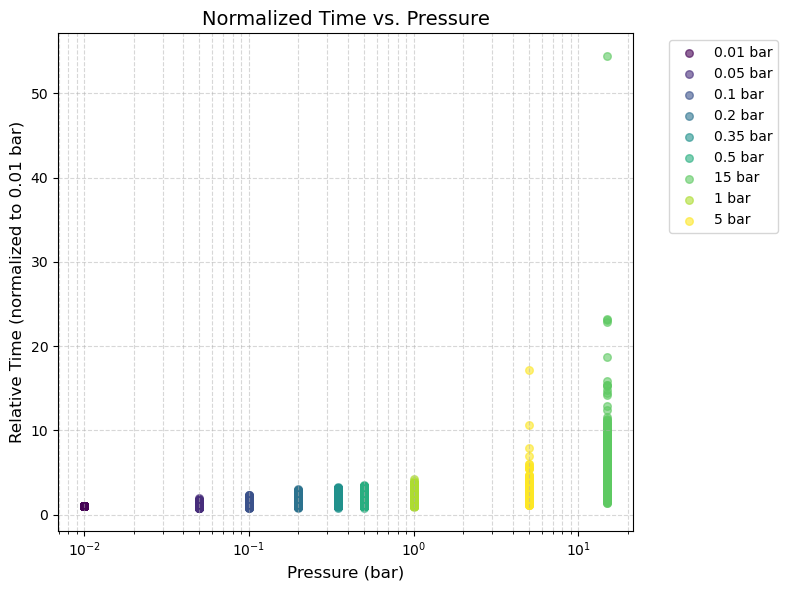

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# 색상 팔레트
colors = plt.cm.viridis(np.linspace(0, 1, len(di)))

for (barv, values), color in zip(di.items(), colors):
    x_vals = np.full_like(values, fill_value=float(barv), dtype=float)
    plt.scatter(x_vals, values, label=f'{barv} bar', color=color, alpha=0.6, s=30)

# 로그 스케일로 x축 설정
plt.xscale('log')

# 라벨, 제목, 범례
plt.xlabel('Pressure (bar)', fontsize=12)
plt.ylabel('Relative Time (normalized to 0.01 bar)', fontsize=12)
plt.title('Normalized Time vs. Pressure', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


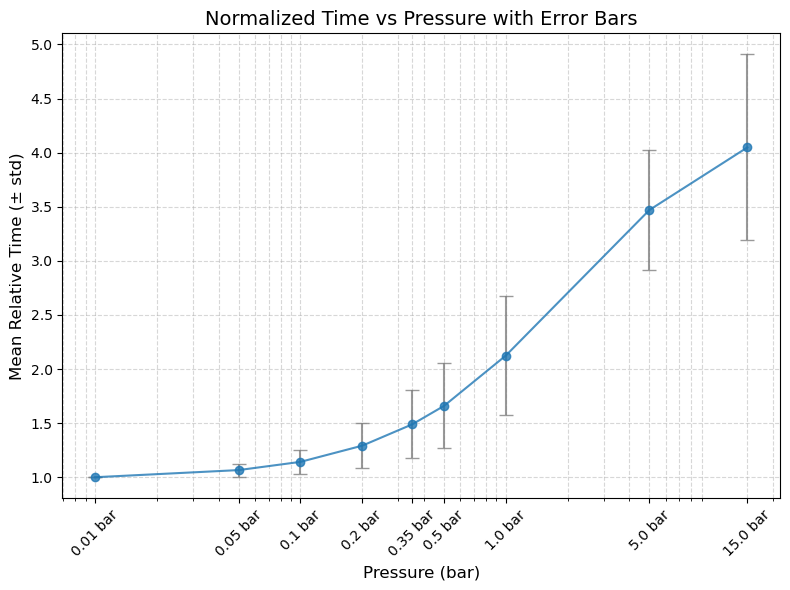

In [54]:
import numpy as np

mean_std_dict = {}
for barv, values in di.items():
    barv_float = float(barv)
    mean = np.mean(values)
    std = np.std(values)
    mean_std_dict[barv_float] = (mean, std)
import matplotlib.pyplot as plt

# x, y, yerr 데이터 정리
bar_vals = sorted(mean_std_dict.keys())  # 압력(bar)을 정렬
means = [mean_std_dict[b][0] for b in bar_vals]
stds = [mean_std_dict[b][1] for b in bar_vals]

# 시각화
plt.figure(figsize=(8, 6))
plt.errorbar(bar_vals, means, yerr=stds, fmt='o-', capsize=5, color='tab:blue', ecolor='gray', alpha=0.8)

# 로그 스케일 유지
plt.xscale('log')

# 실제 bar 값 그대로 마커에 표시
plt.xticks(bar_vals, [str(b) + " bar" for b in bar_vals], rotation=45)

plt.xlabel('Pressure (bar)', fontsize=12)
plt.ylabel('Mean Relative Time (± std)', fontsize=12)
plt.title('Normalized Time vs Pressure with Error Bars', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

